In [1]:
# add repo path to the system path
from pathlib import Path
import os, sys
repo_path= Path.cwd().resolve()
while '.gitignore' not in os.listdir(repo_path): # while not in the root of the repo
    repo_path = repo_path.parent #go up one level
sys.path.insert(0,str(repo_path)) if str(repo_path) not in sys.path else None

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import sklearn
# normalize the features
from sklearn.preprocessing import StandardScaler
# classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# use leave one out cross validation
from sklearn.model_selection import LeaveOneOut
# metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import roc_curve

Test index:[0], Real: [1], Predicted: [0.93749972 0.06250028], coeficients: [-2.70804534]
Test index:[1], Real: [1], Predicted: [0.93749972 0.06250028], coeficients: [-2.70804534]
Test index:[2], Real: [1], Predicted: [0.93749972 0.06250028], coeficients: [-2.70804534]
Test index:[3], Real: [0], Predicted: [0.90624753 0.09375247], coeficients: [-2.26865443]
Test index:[4], Real: [0], Predicted: [0.90624753 0.09375247], coeficients: [-2.26865443]
Test index:[5], Real: [0], Predicted: [0.90624753 0.09375247], coeficients: [-2.26865443]
Test index:[6], Real: [0], Predicted: [0.90624753 0.09375247], coeficients: [-2.26865443]
Test index:[7], Real: [0], Predicted: [0.90624753 0.09375247], coeficients: [-2.26865443]
Test index:[8], Real: [0], Predicted: [0.90624753 0.09375247], coeficients: [-2.26865443]
Test index:[9], Real: [0], Predicted: [0.90624753 0.09375247], coeficients: [-2.26865443]
Test index:[10], Real: [0], Predicted: [0.90624753 0.09375247], coeficients: [-2.26865443]
Test inde

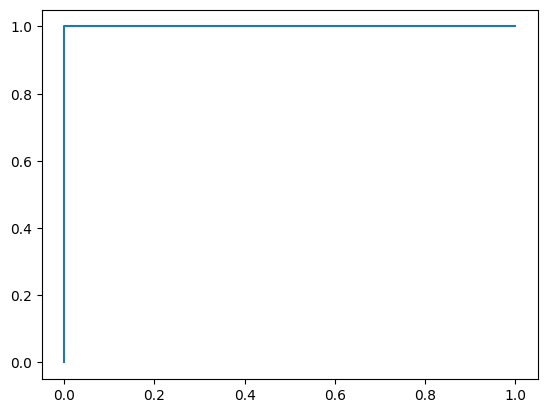

In [14]:
# Input data
receptor = 'RP'
# make all features zero
features = pd.DataFrame(np.zeros((33,10)))

# labels = dataset_INCan().labels_list(receptor)
# labels = pd.DataFrame(labels, columns=[receptor])

labels = pd.DataFrame(np.zeros((33,1)), columns=['label'], dtype=int)
# half of the samples are positive
labels.iloc[0:3] = 1


# prepare for the machine
cv = LeaveOneOut()
scaler = StandardScaler()
pred = LogisticRegression(class_weight=None)

y_prob_list = []

for train_index, test_index in cv.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    # scale the data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # get the train and test labels
    y_train, y_test = labels.iloc[train_index], labels.iloc[test_index]

    # fit the model
    pred.fit(X_train, y_train.values.ravel())
    # predict the probability
    y_prob = pred.predict_proba(X_test)
    y_prob_list.append(y_prob)
    print(f'Test index:{test_index}, Real: {y_test.values[0]}, Predicted: {y_prob[0]}, coeficients: {pred.intercept_}')
    
    if test_index[0] == 32:
        break
y_prob_list = np.array(y_prob_list)
y_prob = y_prob_list.reshape(-1,2)

# get roc curve
fpr, tpr, thresholds = roc_curve(labels, y_prob[:,0])
# get auc
auc = roc_auc_score(labels, y_prob[:,0])
# plot the roc curve
plt.plot(fpr, tpr, label=f'AUC={auc}')